In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pyvisa
import time
import datetime
import serial
rm = pyvisa.ResourceManager()
rm.list_resources()
## jupyter notebook --notebook-dir=z:\lafe 
# run this then select the device and edit the next field to get correct address
# this is for the Agilent 8364B PNA Series Network Analyzer

('ASRL1::INSTR',
 'ASRL3::INSTR',
 'ASRL6::INSTR',
 'ASRL18::INSTR',
 'GPIB0::3::INSTR',
 'GPIB1::19::INSTR')

In [2]:
vna_gpib = rm.open_resource('GPIB1::19::INSTR')  

In [3]:
vna_gpib.query('calculate:parameter:catalog:ext?')

'"CH1_S12_1,S12,CH1_S12_2,S12"\n'

(1.0, 15.0)

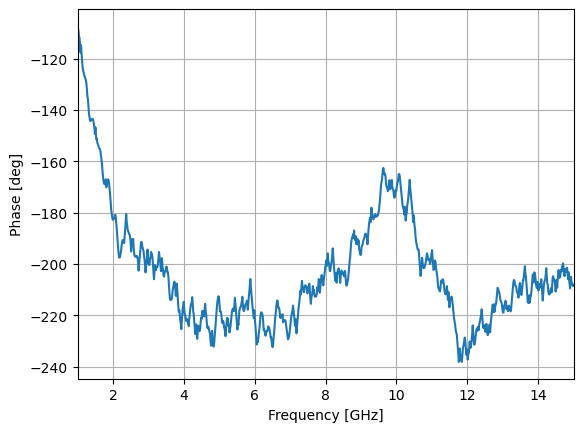

In [6]:
f_start = float(vna_gpib.query('SENS:FREQ:STAR?'))
f_stop = float(vna_gpib.query('SENS:FREQ:STOP?'))
npts = int(vna_gpib.query('SENS:SWE:POIN?'))
frequency = np.linspace(f_start,f_stop,npts);

power = float(vna_gpib.query('SOUR:POW1?'))
rbw = float(vna_gpib.query('sense:bandwidth:resolution?'))

vna_gpib.write('CALCulate:PARameter:SELect "CH1_S12_2"')
vna_gpib.write('FORMat ASCII, 0')
rawdata = vna_gpib.query('CALCulate:DATA? FDATA')
asciiarray = rawdata.split(',')
data = []
for element in asciiarray:
    converted_float = float(element)
    data.append(converted_float)

    
vna_gpib.write('CALCulate:PARameter:SELect "CH1_S12_1"')
vna_gpib.write('FORMat ASCII, 0')
rawdata = vna_gpib.query('CALCulate:DATA? FDATA')
asciiarray = rawdata.split(',')
data2 = []
for element in asciiarray:
    converted_float = float(element)
    data2.append(converted_float)

    
jsondata = json.loads('{}')
jsondata['S21_logmag'] = data
jsondata['S21_phase'] = data2
jsondata['frequency'] = frequency.tolist()
jsondata['notes'] = "test data"
jsondata['power'] = power
jsondata['resolution_bandwidth'] = rbw
jsondata['npts'] = npts
jsondata['f_start'] = f_start
jsondata['f_stop'] = f_stop
jsondata['timestamp'] = int(time.time())
jsonstring = json.dumps(jsondata, indent=2)

filename = "testdata_withphase.txt"
jsonstring = json.dumps(jsondata)
file = open(filename, 'w')
file.write(jsonstring)
file.close()

plt.plot(frequency/1e9,np.unwrap(data2))
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('Phase [deg]')
#plt.ylim((-180,180))
plt.xlim((1,15))

(1.0, 15.0)

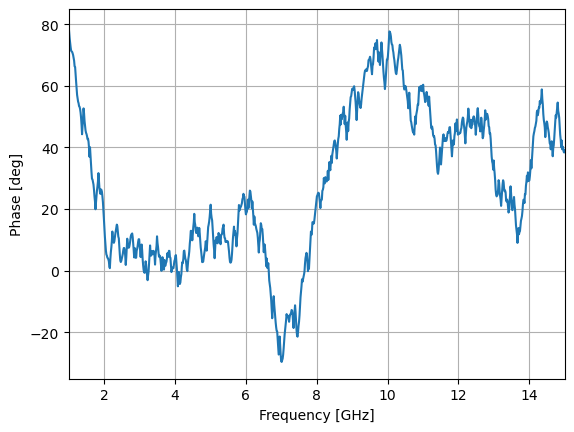

In [7]:
f_start = float(vna_gpib.query('SENS:FREQ:STAR?'))
f_stop = float(vna_gpib.query('SENS:FREQ:STOP?'))
npts = int(vna_gpib.query('SENS:SWE:POIN?'))
frequency = np.linspace(f_start,f_stop,npts);

power = float(vna_gpib.query('SOUR:POW1?'))
rbw = float(vna_gpib.query('sense:bandwidth:resolution?'))

vna_gpib.write('CALCulate:PARameter:SELect "CH1_S12_2"')
vna_gpib.write('FORMat ASCII, 0')
rawdata = vna_gpib.query('CALCulate:DATA? FDATA')
asciiarray = rawdata.split(',')
data = []
for element in asciiarray:
    converted_float = float(element)
    data.append(converted_float)

    
vna_gpib.write('CALCulate:PARameter:SELect "CH1_S12_1"')
vna_gpib.write('FORMat ASCII, 0')
rawdata = vna_gpib.query('CALCulate:DATA? FDATA')
asciiarray = rawdata.split(',')
data2 = []
for element in asciiarray:
    converted_float = float(element)
    data2.append(converted_float)

    
jsondata = json.loads('{}')
jsondata['S21_logmag'] = data
jsondata['S21_phase'] = data2
jsondata['frequency'] = frequency.tolist()
jsondata['notes'] = "test data"
jsondata['power'] = power
jsondata['resolution_bandwidth'] = rbw
jsondata['npts'] = npts
jsondata['f_start'] = f_start
jsondata['f_stop'] = f_stop
jsondata['timestamp'] = int(time.time())
jsonstring = json.dumps(jsondata, indent=2)

filename = "testdata_withphase.txt"
jsonstring = json.dumps(jsondata)
file = open(filename, 'w')
file.write(jsonstring)
file.close()

plt.plot(frequency/1e9,np.unwrap(data2))
plt.grid()
plt.xlabel('Frequency [GHz]')
plt.ylabel('Phase [deg]')
#plt.ylim((-180,180))
plt.xlim((1,15))